In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass 

# Vous pouvez maintenant utiliser file_list pour vos besoins

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Installation des lib nécessaires

In [3]:
!pip install openml

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 6.6 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=a0da99fcf45d1e448823f151f8f1e03c13aa3d5a876341113c658933b363cfb3
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


### Charger les librairies

In [152]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randint
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import openml as oml
import tensorflow.keras as keras
from tensorflow import keras
from tensorflow.keras import layers, models

#### Importer les bases de données

In [153]:
# Charger les données 
data_train = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Train.csv')  
data_meta = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Meta.csv') 


### 1- ANALYSE EXPLORATOIRE DES DONNEES (EDA)

In [154]:
# Afficher aléatoirement 5 lignes des bases
print(data_train.sample(5))


       Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
34242     34      33       5       5      28      27       35   
108       57      54       6       6      51      49       20   
2689      84      84       8       7      77      77        1   
32551     33      30       6       5      27      25       31   
32426     61      59       5       5      56      54       31   

                                 Path  
34242  Train/35/00035_00001_00013.png  
108    Train/20/00020_00003_00018.png  
2689    Train/1/00001_00070_00019.png  
32551  Train/31/00031_00016_00001.png  
32426  Train/31/00031_00011_00026.png  


In [155]:
print(data_meta.sample(5))


           Path  ClassId  ShapeId  ColorId SignId
22  Meta/29.png       29        0        0   1.34
14  Meta/20.png       20        0        0    1.1
8   Meta/15.png       15        1        0    3.1
27  Meta/33.png       33        1        1    4.2
28  Meta/34.png       34        1        1    4.3


In [156]:
# Infos sur la base train
print("\nInformations générales sur la base de données d'entraînement :")
data_train.info()



Informations générales sur la base de données d'entraînement :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [157]:
# Informations générales: Lignes et colonnes
print(
    f"\nInformations générales sur le DataFrame d'entraînement : \n"
    f"la base contient {data_train.shape[0]} lignes et "
    f"{data_train.shape[1]} colonnes."
)



Informations générales sur le DataFrame d'entraînement : 
la base contient 39209 lignes et 8 colonnes.


In [159]:
# Statistiques descriptives 
print("\nStatistiques descriptives :")
print(data_train.describe())


Statistiques descriptives :
              Width        Height        Roi.X1        Roi.Y1        Roi.X2  \
count  39209.000000  39209.000000  39209.000000  39209.000000  39209.000000   
mean      50.835880     50.328930      5.999515      5.962381     45.197302   
std       24.306933     23.115423      1.475493      1.385440     23.060157   
min       25.000000     25.000000      0.000000      5.000000     20.000000   
25%       35.000000     35.000000      5.000000      5.000000     29.000000   
50%       43.000000     43.000000      6.000000      6.000000     38.000000   
75%       58.000000     58.000000      6.000000      6.000000     53.000000   
max      243.000000    225.000000     20.000000     20.000000    223.000000   

             Roi.Y2       ClassId  
count  39209.000000  39209.000000  
mean      44.728379     15.788390  
std       21.971145     12.013238  
min       20.000000      0.000000  
25%       30.000000      5.000000  
50%       38.000000     12.000000  
75%    

In [160]:
# Vérification de la répartition des classes de panneaux
class_counts = data_train['ClassId'].value_counts()
print("\nDistribution des classes de panneaux :")
print(class_counts.sort_index())
print(f"\nNous avons,{len(class_counts)} classes de panneaux")


Distribution des classes de panneaux :
ClassId
0      210
1     2220
2     2250
3     1410
4     1980
5     1860
6      420
7     1440
8     1410
9     1470
10    2010
11    1320
12    2100
13    2160
14     780
15     630
16     420
17    1110
18    1200
19     210
20     360
21     330
22     390
23     510
24     270
25    1500
26     600
27     240
28     540
29     270
30     450
31     780
32     240
33     689
34     420
35    1200
36     390
37     210
38    2070
39     300
40     360
41     240
42     240
Name: count, dtype: int64

Nous avons,43 classes de panneaux


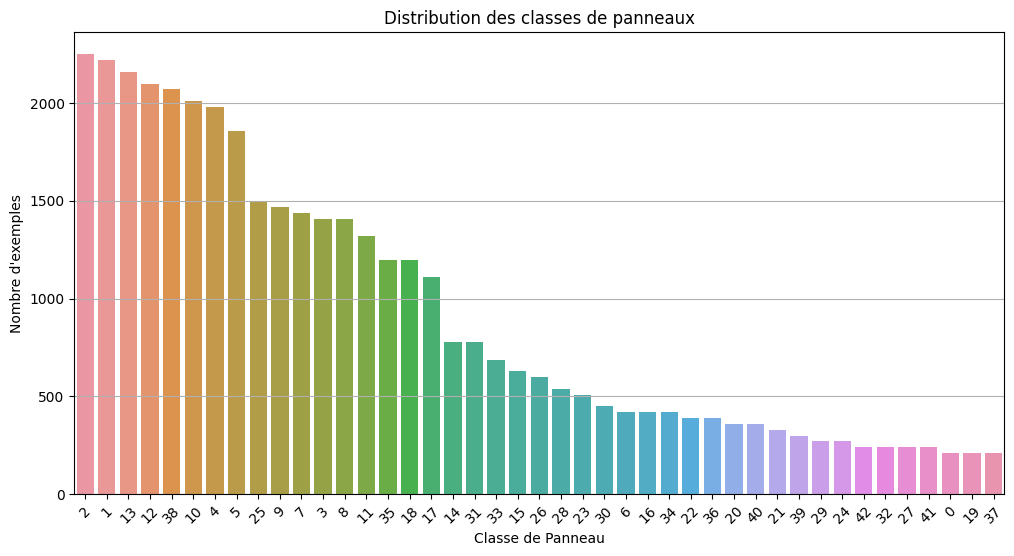

In [161]:
# Visualisation de la distribution des classes
plt.figure(figsize=(12, 6))
sns.countplot(data=data_train, x='ClassId', order=class_counts.index)
plt.title('Distribution des classes de panneaux')
plt.xlabel('Classe de Panneau')
plt.ylabel('Nombre d\'exemples')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [162]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes dans le DataFrame :")
print(data_train.isnull().sum())



Valeurs manquantes dans le DataFrame :
Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64


Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Train/24/00024_00008_00001.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Train/10/00010_00034_00014.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Train/5/00005_00039_00008.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Train/37/00037_00004_00025.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Train/7/00007_00042_00007.png


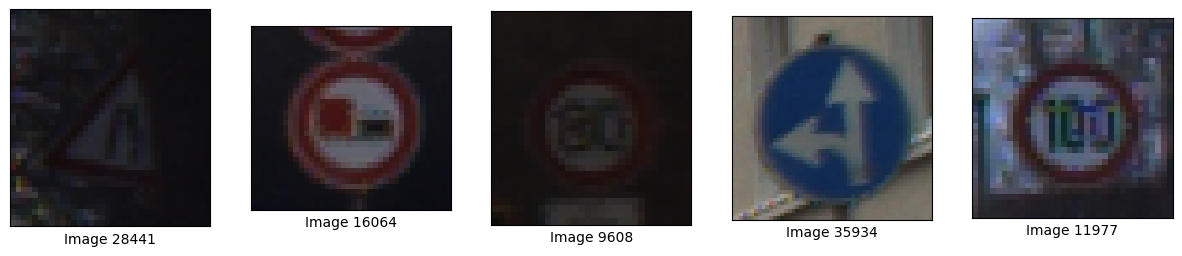

In [163]:
# Afficher 5 images aléatoirements
# Chemin de base pour les images
base_image_path = '/kaggle/input/gtsrb-german-traffic-sign/'

# Prendre quelques exemples aléatoires
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Affichage de 5 images de façon aléatoire
for i in range(5):
    # Sélectionner un index aléatoire dans la base
    n = randint(0, len(data_train) - 1)
    image_path = data_train['Path'].iloc[n]  # Récupérer le chemin d'image depuis la base
    full_path = os.path.join(base_image_path, image_path)  # Construire le chemin complet
    print(f"Vérification du chemin: {full_path}")  # Afficher le chemin complet
    if os.path.exists(full_path):
        img = mpimg.imread(full_path)
        axes[i].imshow(img)
        axes[i].set_xticks([])  # Ne pas afficher les axes x
        axes[i].set_yticks([])  # Ne pas afficher les axes y
        axes[i].set_xlabel(f"Image {n}")  # Étiqueter l'image avec son index
    else:
        axes[i].set_title(f"L'image {full_path} n'existe pas.")
        axes[i].axis('off')  # Masquer l'axe si l'image n'existe pas

plt.show()


### 2- Etatpe de Preprocessing:

-- Redimensionner les images

-- Conversion des images en RGB

-- Normalisation (Réduire l'effet des grandes erreurs sur la fonction coût)

In [164]:
# Fonction pour charger et redimensionner les images
def load_and_preprocess_image(image_path, target_size=(32, 32)):
    img = cv2.imread(image_path)                     # Lecture de l'image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)       # Convertir l'image en RGB
    img = cv2.resize(img, target_size)               # Redimensionner l'image
    img = img / 255.0                                # Normalisation des pixels (valeurs entre 0 et 1)
    return img


In [165]:
# Charger et prétraiter les images
images = []
for path in data_train['Path']:
    full_path = os.path.join(base_image_path, path) 
    img = load_and_preprocess_image(full_path)
    images.append(img)


In [166]:
# Convertir la liste d'images 
X = np.array(images)
X.shape


(39209, 32, 32, 3)

In [167]:
# Convertir les étiquettes 
y = to_categorical(data_train['ClassId'])
y.shape

(39209, 43)

In [168]:
# Division en Train et val  nos données d'entrainnements
# Division des données avec stratification sur les labels y
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [169]:
# Afficher les dimensions des ensembles de données
print(f'Dimensions du jeu d\'entraînement : {X_train.shape}, {y_train.shape}')
print(f'Dimensions du jeu de validation : {X_val.shape}, {y_val.shape}')


Dimensions du jeu d'entraînement : (31367, 32, 32, 3), (31367, 43)
Dimensions du jeu de validation : (7842, 32, 32, 3), (7842, 43)


### 3-  Architecture du model CNN

In [201]:
# Création du model de CNN

def create_model(dropout_rate=None, 
                 batch_normalization=False, 
                 weight_initializer='he_normal', 
                 num_classes=43, 
                 conv_layers=[32, 64, 128],                 # Nombre de filtres pour chaque couche de convolution
                 dense_units=[128, 64],                     # Nombre d'unités pour chaque couche dense
                 activation='relu'):                        # Fonction d'activation
    model = models.Sequential()

    # Première couche de convolution
    model.add(layers.Conv2D(conv_layers[0], (3, 3), activation=activation, kernel_initializer=weight_initializer, input_shape=(32, 32, 3)))
    if batch_normalization:
        model.add(layers.BatchNormalization())
    if dropout_rate:
        model.add(layers.Dropout(dropout_rate))  
    model.add(layers.MaxPooling2D((2, 2)))

    # Ajouter des couches de convolution en fonction de conv_layers
    for filters in conv_layers[1:]:
        model.add(layers.Conv2D(filters, (3, 3), activation=activation, kernel_initializer=weight_initializer))
        if batch_normalization:
            model.add(layers.BatchNormalization())
        if dropout_rate:
            model.add(layers.Dropout(dropout_rate))  
        model.add(layers.MaxPooling2D((2, 2)))

    # Aplatir les sorties pour les couches fully connected
    model.add(layers.Flatten())

    # Couches fully connected
    for units in dense_units:
        model.add(layers.Dense(units, activation=activation, kernel_initializer=weight_initializer))
        if dropout_rate:
            model.add(layers.Dropout(dropout_rate))  

    # Couche de sortie avec activation softmax
    model.add(layers.Dense(num_classes, activation='softmax'))  

    return model


### Résumé du modèle

In [202]:
# Initialiser le modèle
model = create_model(dropout_rate=0.2,
                   batch_normalization=True )
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,859 (667.42 KB)

 Trainable params: 170,411 (665.67 KB)

 Non-trainable params: 448 (1.75 KB)

## 3- Nous commençons par un modèle
-- Avec bachNormalisation


-- Avec drop_out  

-- sans data augmentation

-- Sans earlystopping


In [203]:
# Compiler le modèle

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entraîner le modèle 
history= model.fit(X_train, y_train, batch_size=32,
          validation_data=(X_val, y_val),
          epochs=50) 

Epoch 1/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3345 - loss: 2.5281 - val_accuracy: 0.8988 - val_loss: 0.3232
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8577 - loss: 0.4399 - val_accuracy: 0.9671 - val_loss: 0.1064
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9343 - loss: 0.2126 - val_accuracy: 0.9815 - val_loss: 0.0615
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9571 - loss: 0.1347 - val_accuracy: 0.9829 - val_loss: 0.0569
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9645 - loss: 0.1152 - val_accuracy: 0.9893 - val_loss: 0.0364
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9679 - loss: 0.1026 - val_accuracy: 0.9922 - val_loss: 0.0298
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9787 - loss: 0.0721 - val_accuracy: 0.9897 - val_loss: 0.0372
Epoch 8/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9777 - loss: 0.0736 - val_accuracy: 

### 3 -1 Les courbes d'apprentissage et de validation

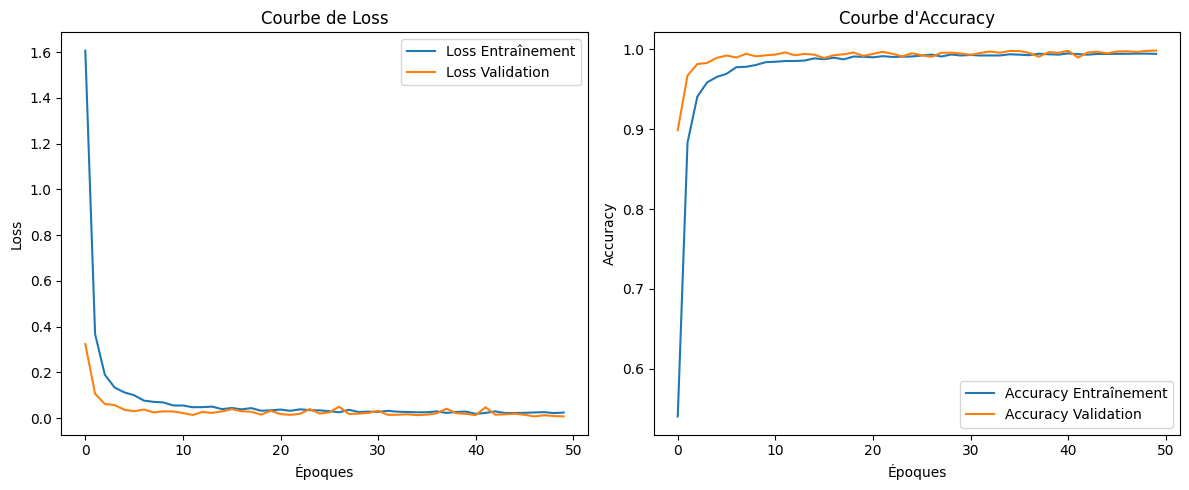

In [219]:
# Tracer les courbes d'apprentissage
plt.figure(figsize=(12, 5))

# Courbe de Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss Entraînement')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.title('Courbe de Loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

# Courbe d'Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy Entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy Validation')
plt.title('Courbe d\'Accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### 3-2 Evaluation du modèle simple

#### Charger les données de test et les traiter au format adapaté pour le test

In [220]:
## Donnes test
data_test = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')
print(data_test.sample(5))


       Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
10654     44      44       5       5      39      39       16  Test/10654.png
4331      72      62       7       5      66      57       24  Test/04331.png
2230      76      75       7       7      70      69       14  Test/02230.png
6878      41      38       6       5      35      32       18  Test/06878.png
4722      27      29       5       6      21      23        4  Test/04722.png


In [221]:
# Séparation des caractéristiques (features) et de la variable cible (target)
X_test = data_test[['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2']]
y_test = to_categorical(data_test['ClassId'])

# Affichage des résultats
print("X_test :")
print(X_test.head())
print("\ny_test :")
print(y_test.shape)

X_test :
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2
0     53      54       6       5      48      49
1     42      45       5       5      36      40
2     48      52       6       6      43      47
3     27      29       5       5      22      24
4     60      57       5       5      55      52

y_test :
(12630, 43)


In [222]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Fonction pour charger et redimensionner les images
def load_and_preprocess_image(image_path, target_size=(32, 32)):
    img = load_img(image_path, target_size=target_size)  # Charger l'image et la redimensionner
    img_array = img_to_array(img)  
    return img_array

# Construire le jeu de données avec les images
X_test_images = []

for path in data_test['Path']:  # Assurez-vous que df_test contient les chemins d'image
    full_path = os.path.join(base_image_path, path)
    if os.path.exists(full_path):
        img_array = load_and_preprocess_image(full_path)
        X_test_images.append(img_array)
    else:
        print(f"L'image {full_path} n'existe pas.")

# Convertir la liste en un tableau numpy
X_test_images = np.array(X_test_images)

# Normaliser les images (si nécessaire)
X_test_images = X_test_images / 255.0  # Normalisation des pixels entre 0 et 1

print(X_test_images.shape)

(12630, 32, 32, 3)


In [223]:
# On récupère les classes à partir de data_test
gtsrb_classes = data_test['ClassId'].unique()  
gtsrb_classes = sorted(gtsrb_classes)  

# Prédictions
y_pred = model.predict(X_test_images)

#  Convertir les probabilités en classes
predicted_classes = np.argmax(y_pred, axis=1)

#  Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test_images, y_test, verbose=0)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Loss: 0.1584, Accuracy: 0.9697


### Commentaire
Le modèle présente des performances solides sur les données de test avec une **accuracy** de **96.97%** et une **loss** de **0.16**. Cela suggère qu'il parvient à bien reconnaître les classes sur des données qu'il n'a jamais vues auparavant, tout en maintenant une erreur relativement faible.

En comparant ces résultats avec les performances sur les données d'entraînement (**accuracy de 99.%** et **loss de 0.0167**), on peut observer une légère baisse d'accuracy et une augmentation de la loss. Cette différence est attendue, car un modèle peut toujours mieux performer sur les données qu'il a utilisées pour s'entraîner. Cependant, l'écart ici est faible, ce qui indique que le modèle **généralise bien** et qu'il n'y a pas de surapprentissage excessif (overfitting).


Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Test/01779.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Test/04041.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Test/02856.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Test/09527.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Test/06135.png


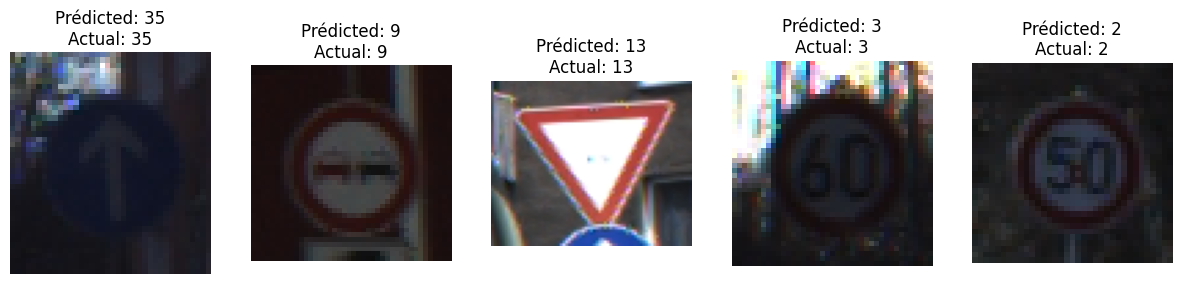

In [210]:
# Afficher quelques exemples de prédictions
num_examples = 5  

fig, axes = plt.subplots(1, num_examples, figsize=(15, 5))

for i in range(num_examples):
    n = randint(0, len(X_test) - 1)                       # Sélectionner un index aléatoire dans les données de test
    image_path = data_test['Path'].iloc[n]               # Récupérer le chemin d'image depuis la base
    full_path = os.path.join(base_image_path, image_path)  # Construire le chemin complet
    print(f"Vérification du chemin: {full_path}")          # Afficher le chemin complet

    # Afficher l'image
    if os.path.exists(full_path):
        img = mpimg.imread(full_path)
        axes[i].imshow(img)
        actual_class = np.argmax(y_test[n]) if y_test.ndim > 1 else y_test[n]
        
        # Afficher les étiquettes prédite et réelle
        axes[i].set_title(f'Prédicted: {gtsrb_classes[predicted_classes[n]]}\nActual: {gtsrb_classes[actual_class]}')
    else:
        axes[i].set_title(f"L'image {full_path} n'existe pas.")
    
    axes[i].axis('off')  # Masquer les axes

plt.show()


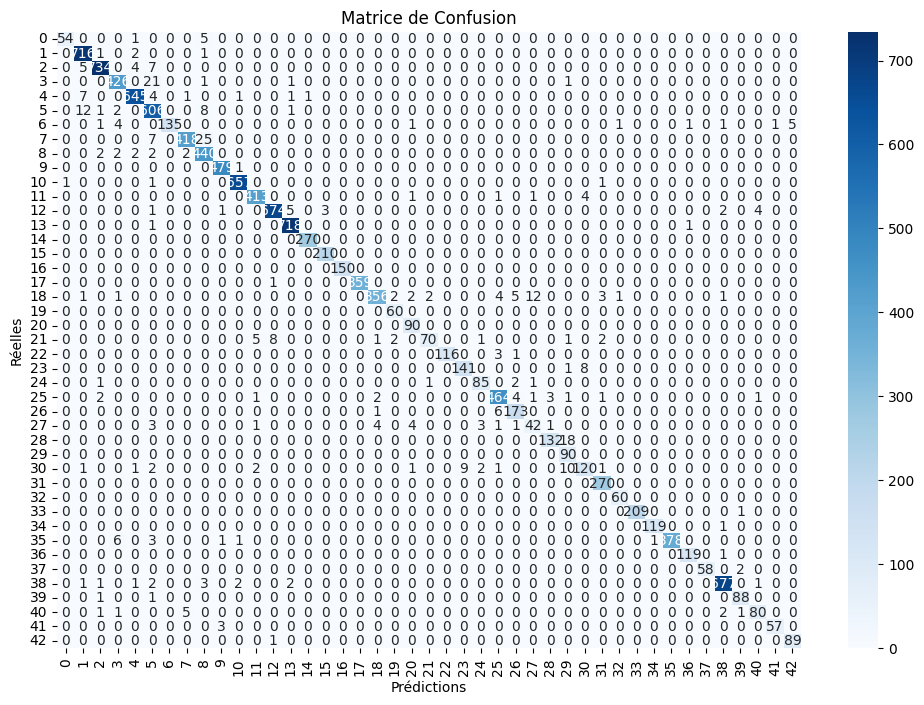

In [212]:
from sklearn.metrics import confusion_matrix

true_classes = np.argmax(y_test, axis=1) 

# Étape 4 : Calculer la matrice de confusion
cm = confusion_matrix(true_classes, predicted_classes)

# Étape 5 : Afficher la matrice de confusion
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gtsrb_classes, yticklabels=gtsrb_classes)
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.title('Matrice de Confusion')
plt.show()


In [213]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculer et afficher le rapport de classification
print(classification_report(true_classes, predicted_classes))



              precision    recall  f1-score   support

           0       0.98      0.90      0.94        60
           1       0.96      0.99      0.98       720
           2       0.99      0.98      0.98       750
           3       0.96      0.95      0.96       450
           4       0.98      0.98      0.98       660
           5       0.92      0.96      0.94       630
           6       1.00      0.90      0.95       150
           7       0.98      0.93      0.95       450
           8       0.91      0.98      0.94       450
           9       0.99      1.00      0.99       480
          10       0.99      1.00      0.99       660
          11       0.98      0.98      0.98       420
          12       0.99      0.98      0.98       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [ ]:

img_tensor = X_val[4]  
img_tensor = np.expand_dims(img_tensor, axis=0)  

# Extraire les sorties des 5 premières couches
layer_outputs = [layer.output for layer in model.layers[:5]]  # Change le nombre selon tes besoins
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Prédire les activations pour l'image sélectionnée
activations = activation_model.predict(img_tensor)

def plot_activations(activations, layer_names):
    images_per_row = 16 

    # Pour chaque activation
    for layer_name, layer_activation in zip(layer_names, activations):
        # Nombre de filtres dans la carte d'activation
        n_features = layer_activation.shape[-1]

        # Dimensions de la carte d'activation
        size = layer_activation.shape[1]

        # Créer une grille pour afficher les filtres
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # Remplir la grille avec les filtres
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                # Normalisation
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size:(col + 1) * size,
                             row * size:(row + 1) * size] = channel_image

        # Afficher la grille
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation de la couche {}".format(layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.axis('off')  # Pas d'axes
        plt.show()

# Récupérer les noms des couches
layer_names = [layer.name for layer in model.layers[:5]]  # Change le nombre selon tes besoins

# Appeler la fonction pour afficher les activations
plot_activations(activations, layer_names)


In [ ]:
plot_activations(1, activations)

### 4- Avec data agumentation 
Reseau de neurone avec 

-- BashNormalisation  

-- drop_aout

-- early stopping

In [224]:
# Augmentation des données
from tensorflow.keras.preprocessing.image import ImageDataGenerator

num_classes = 43  


# Créer un générateur d'images pour l'augmentation des données
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Ajuster le générateur sur l'ensemble d'entraînement
datagen.fit(X_train)

In [225]:
# Initialiser le modèle
model_1= create_model(dropout_rate=0.2, 
             batch_normalization=True, 
             weight_initializer='he_normal', 
             num_classes=43, conv_layers=[32, 64, 128], 
             dense_units=[128, 64], activation='relu')
model_1.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_83 (Dropout)            │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,859 (667.42 KB)

 Trainable params: 170,411 (665.67 KB)

 Non-trainable params: 448 (1.75 KB)

In [226]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Configureration EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # Surveiller la perte de validation
                               patience=10,          # Arrêter si la perte ne s'améliore pas pendant 10 époques
                               verbose=1,           # Afficher un message lors de l'arrêt
                               restore_best_weights=True)  # Restaurer les meilleurs poids



# Configurer le taux d'apprentissage dynamique
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Sauvegarde des meilleurs poids
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Compiler le modèle
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [218]:

# Ajuster le modèle avec EarlyStopping et autres callbacks
history_1 = model_1.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val), 
                    epochs=50,
                    callbacks=[early_stopping, reduce_lr, checkpoint])



Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


973/981 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2379 - loss: 2.9138
Epoch 1: val_loss improved from inf to 0.79548, saving model to best_model.keras
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.2391 - loss: 2.9072 - val_accuracy: 0.7284 - val_loss: 0.7955 - learning_rate: 0.0010
Epoch 2/50
973/981 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6559 - loss: 1.0517
Epoch 2: val_loss improved from 0.79548 to 0.31210, saving model to best_model.keras
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.6564 - loss: 1.0502 - val_accuracy: 0.8979 - val_loss: 0.3121 - learning_rate: 0.0010
Epoch 3/50
976/981 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8130 - loss: 0.5720
Epoch 3: val_loss improved from 0.31210 to 0.18777, saving model to best_model.keras
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.8131 - loss: 0.5716 - val_accuracy: 0.9347 - val_loss: 0.1878 - learning_rate: 0.0010
Epoch 4/50
973/981 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.870

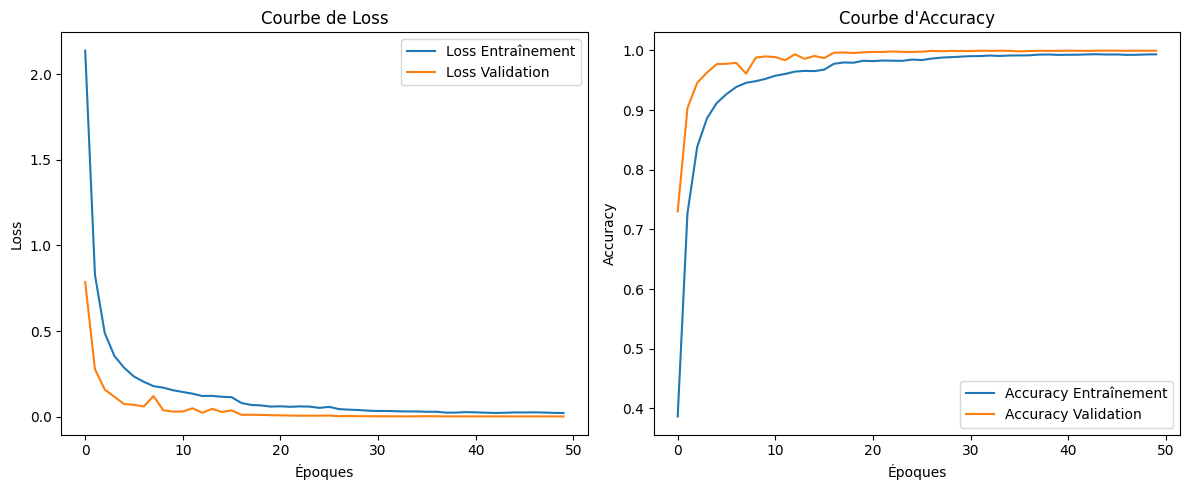

In [47]:
# Tracer les courbes d'apprentissage
plt.figure(figsize=(12, 5))

# Courbe de Loss
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Loss Entraînement')
plt.plot(history_1.history['val_loss'], label='Loss Validation')
plt.title('Courbe de Loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

# Courbe d'Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Accuracy Entraînement')
plt.plot(history_1.history['val_accuracy'], label='Accuracy Validation')
plt.title('Courbe d\'Accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
from tensorflow.keras.models import load_model

# Charger le meilleur modèle sauvegardé
best_model = load_model('best_model.keras')


In [61]:
# Les predictions 
y_pred = best_model.predict(X_test_images)

#  Convertir les probabilités en classes
predicted_classes = np.argmax(y_pred, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Test/11824.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Test/00312.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Test/00759.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Test/06496.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Test/02043.png


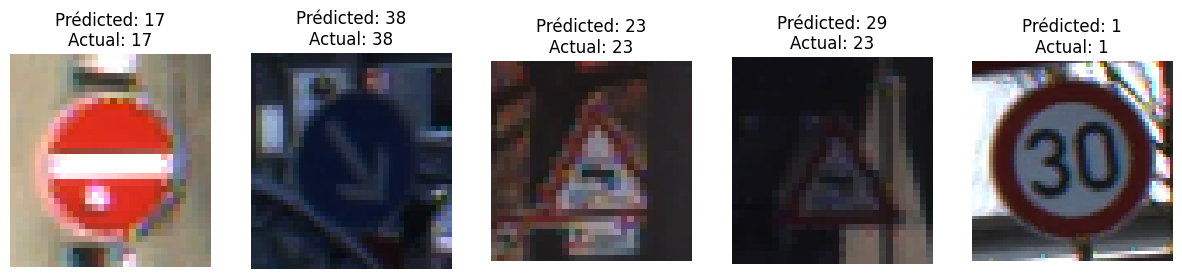

In [62]:
# Afficher quelques exemples de prédictions
num_examples = 5  

fig, axes = plt.subplots(1, num_examples, figsize=(15, 5))

for i in range(num_examples):
    n = randint(0, len(X_test) - 1)                       # Sélectionner un index aléatoire dans les données de test
    image_path = data_test['Path'].iloc[n]               # Récupérer le chemin d'image depuis la base
    full_path = os.path.join(base_image_path, image_path)  # Construire le chemin complet
    print(f"Vérification du chemin: {full_path}")          # Afficher le chemin complet

    # Afficher l'image
    if os.path.exists(full_path):
        img = mpimg.imread(full_path)
        axes[i].imshow(img)
        actual_class = np.argmax(y_test[n]) if y_test.ndim > 1 else y_test[n]
        
        # Afficher les étiquettes prédite et réelle
        axes[i].set_title(f'Prédicted: {gtsrb_classes[predicted_classes[n]]}\nActual: {gtsrb_classes[actual_class]}')
    else:
        axes[i].set_title(f"L'image {full_path} n'existe pas.")
    
    axes[i].axis('off')  # Masquer les axes

plt.show()


In [63]:
#  Évaluation du modèle sur l'ensemble de test
loss, accuracy = best_model.evaluate(X_test_images, y_test)
print(f'Best model - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.2825
Best model - Loss: 0.2810, Accuracy: 0.9667


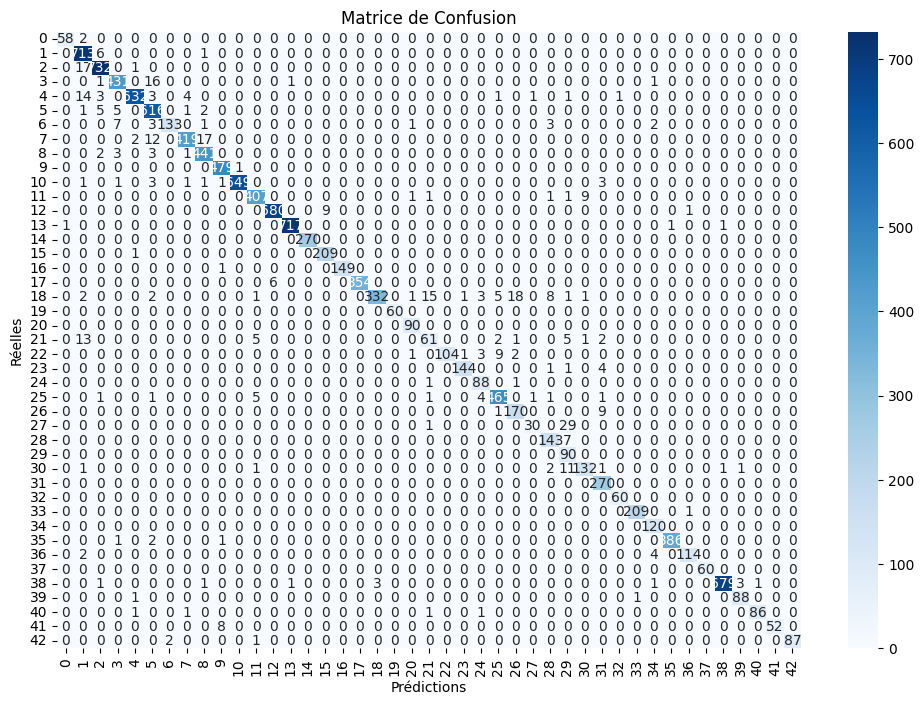

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Étape 3 : Convertir y_test en classes si nécessaire (one-hot vs. entiers)
true_classes = np.argmax(y_test, axis=1)  # Convertir y_test one-hot en classes

# Étape 4 : Calculer la matrice de confusion
cm = confusion_matrix(true_classes, predicted_classes)

# Étape 5 : Afficher la matrice de confusion
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gtsrb_classes, yticklabels=gtsrb_classes)
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.title('Matrice de Confusion')
plt.show()



In [65]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculer et afficher le rapport de classification
print(classification_report(true_classes, predicted_classes))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.93      0.99      0.96       720
           2       0.97      0.98      0.98       750
           3       0.96      0.96      0.96       450
           4       0.99      0.96      0.97       660
           5       0.93      0.98      0.95       630
           6       0.99      0.89      0.93       150
           7       0.98      0.93      0.96       450
           8       0.95      0.98      0.96       450
           9       0.98      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       0.97      0.97      0.97       420
          12       0.99      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       1.00      0.99      1.00       150
          17       1.00    

In [67]:
# Sauvegarde du modele
model.save('best_model.keras')


### 3- Tranfert learning

In [ ]:
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Charger le modèle VGG16 pré-entraîné sans les couches de classification
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Geler les couches de base, mais dégelé les dernières couches
for layer in base_model.layers[:-3]:
    layer.trainable = False
for layer in base_model.layers[-3:]:
    layer.trainable = True

# Ajout de couches de classification personnalisées
model_3 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(43, activation='softmax')
])

# Compiler le modèle
model_3.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Définir les callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6, verbose=1)

# Entraîner le modèle
history = model_3.fit(X_train, y_train,
                       epochs=60,
                       batch_size=32,
                       validation_data=(X_val, y_val),
                       callbacks=[early_stopping, lr_reduction])


In [126]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [127]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [133]:
from tensorflow.keras import models, layers, optimizers


# Geler les couches de base, mais dégelé les dernières couches
for layer in base_model.layers[:-4]:  # Geler toutes les couches sauf les 4 dernières
    layer.trainable = False
for layer in base_model.layers[-4:]:  # Dégeler les 4 dernières couches
    layer.trainable = True

# Ajouter des couches de classification personnalisées
model_3 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),  
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),  
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),  
    layers.Dropout(0.2),
    layers.Dense(43, activation='softmax')  
])



In [134]:
# Définir la fonction d'arrêt précoce
early_stopping = EarlyStopping(monitor='val_loss',  
                               patience=10,          
                               verbose=1,           
                               restore_best_weights=True)  

# Compiler le modèle
model_3.compile(optimizer='adam',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

# Entraîner le modèle
history_2 = model_3.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_val, y_val),
                       epochs=60,  
                       batch_size=32,
                       callbacks=[early_stopping])  


Epoch 1/60
491/491 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.2797 - loss: 5.8550 - val_accuracy: 0.4918 - val_loss: 2.3583
Epoch 2/60
491/491 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.5624 - loss: 1.9004 - val_accuracy: 0.6441 - val_loss: 1.3553
Epoch 3/60
491/491 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.6637 - loss: 1.2666 - val_accuracy: 0.6139 - val_loss: 1.4314
Epoch 4/60
491/491 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.7271 - loss: 1.0204 - val_accuracy: 0.7705 - val_loss: 0.8219
Epoch 5/60
491/491 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.7598 - loss: 0.8790 - val_accuracy: 0.8103 - val_loss: 0.7229
Epoch 6/60
491/491 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.7850 - loss: 0.7965 - val_accuracy: 0.8224 - val_loss: 0.6557
Epoch 7/60
491/491 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.8186 - loss: 0.7029 - val_accuracy: 0.8625 - val_loss: 0.5612
Epoch 8/60
491/491 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.8363 - loss: 0.6422 - 

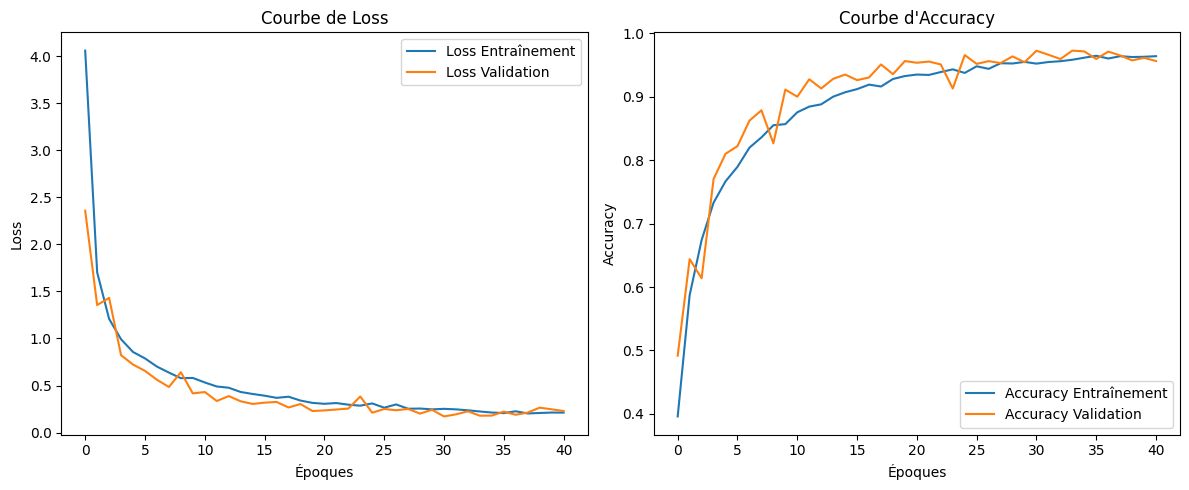

In [135]:
# Tracer les courbes d'apprentissage
plt.figure(figsize=(12, 5))

# Courbe de Loss
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Loss Entraînement')
plt.plot(history_2.history['val_loss'], label='Loss Validation')
plt.title('Courbe de Loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

# Courbe d'Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Accuracy Entraînement')
plt.plot(history_2.history['val_accuracy'], label='Accuracy Validation')
plt.title('Courbe d\'Accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [136]:
# Les predictions 
y_pred = model_3.predict(X_test_images)

#  Convertir les probabilités en classes
predicted_classes = np.argmax(y_pred, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Train/5/00005_00057_00004.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Train/1/00001_00031_00017.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Train/3/00003_00037_00010.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Train/5/00005_00022_00026.png
Vérification du chemin: /kaggle/input/gtsrb-german-traffic-sign/Train/2/00002_00057_00019.png


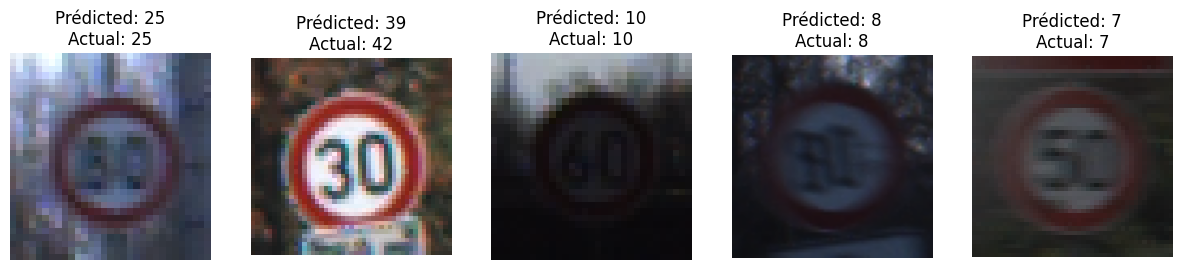

In [137]:
# Afficher quelques exemples de prédictions
num_examples = 5  

fig, axes = plt.subplots(1, num_examples, figsize=(15, 5))

for i in range(num_examples):
    n = randint(0, len(X_test_images) - 1)                # Sélectionner un index aléatoire dans les données de test
    image_path = data_train['Path'].iloc[n]               # Récupérer le chemin d'image depuis la base
    full_path = os.path.join(base_image_path, image_path)  # Construire le chemin complet
    print(f"Vérification du chemin: {full_path}")          # Afficher le chemin complet

    # Afficher l'image
    if os.path.exists(full_path):
        img = mpimg.imread(full_path)
        axes[i].imshow(img)
        actual_class = np.argmax(y_test[n]) if y_test.ndim > 1 else y_test[n]
        
        # Afficher les étiquettes prédite et réelle
        axes[i].set_title(f'Prédicted: {gtsrb_classes[predicted_classes[n]]}\nActual: {gtsrb_classes[actual_class]}')
    else:
        axes[i].set_title(f"L'image {full_path} n'existe pas.")
    
    axes[i].axis('off')  # Masquer les axes

plt.show()


In [138]:
# Évaluation du modèle sur les données de test
test_loss, test_acc = model_3.evaluate(X_test_images, y_test)
print(f"Accuracy on test set: {test_acc:.2f}")



395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7281 - loss: 1.3947
Accuracy on test set: 0.73


### Commentaire
Bien que le modèle présente de bonnes performances sur les ensembles d'entraînement et de validation, l'écart non négligeable avec les résultats sur l'ensemble de test soulève des préoccupations quant à la capacité du modèle à généraliser. 
Le modèle semble trop complexe pour notre problème de classiffication, capturant le bruit des données d'entraînement au lieu de généraliser.
Cela expliquerais le faible taux de précision sur l'ensemble de test par rapport aux ensembles d'entraînement et de validation.

In [ ]:

img_tensor = np.expand_dims(X_test_images[0], axis=0)  

_ = model_3.predict(img_tensor)

# Sélectionner les sorties des premières couches 
layer_outputs = [layer.output for layer in model_3.layers[:8]]

# Création d'un nouveau modèle basé sur l'entrée et la sortie des couches sélectionnées
activation_model = models.Model(inputs=model_3.input, outputs=layer_outputs)

# Obtenir les activations pour l'image donnée
activations = activation_model.predict(img_tensor)

# Affichage des activations
layer_names = [layer.name for layer in model_3.layers[:8]]  # Obtenir les noms des couches

# Visualiser les activations pour chaque couche
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  # Nombre de filtres
    size = layer_activation.shape[1]         # Taille (largeur/hauteur) des activations
    n_cols = n_features // images_per_row    # Nombre de colonnes à afficher
    display_grid = np.zeros((size * n_cols, images_per_row * size))  # Grille d'affichage

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()  # Centrer l'image autour de 0
            channel_image /= (channel_image.std() + 1e-5)  # Normaliser
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')  # Limiter à 0-255
            display_grid[col * size: (col + 1) * size, row * size: (row + 1) * size] = channel_image

    # Affichage de la grille de la couche
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()
